In [56]:
from Neuraline.Utilities.data import DataTable, DataExploration
from Neuraline.Utilities.chart import Chart
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart()

data_table.visualization_csv_inline('./USD_BRL Dados Históricos.csv', limit=10)

╒════════════════════╤══════════╤════════════╤══════════╤══════════╤═════════╤════════╕
│ ﻿Data              │   Último │   Abertura │   Máxima │   Mínima │ Vol.    │ Var%   │
╞════════════════════╪══════════╪════════════╪══════════╪══════════╪═════════╪════════╡
│ 19 de ago. de 2022 │   5.1695 │     5.1685 │   5.2192 │   5.1648 │ 132.82K │ 0.04%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 18 de ago. de 2022 │   5.1674 │     5.1655 │   5.2074 │   5.1283 │ 149.11K │ 0.06%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 17 de ago. de 2022 │   5.1642 │     5.1469 │   5.2144 │   5.1452 │ 167.02K │ 0.36%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 16 de ago. de 2022 │   5.1459 │     5.0987 │   5.1549 │   5.0965 │ 148.45K │ 0.98%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 15 de ago. de 2022 │   5.0961 

True

In [57]:
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path='./USD_BRL Dados Históricos.csv', list_inputs=['Máxima'], training_percentage=.8)

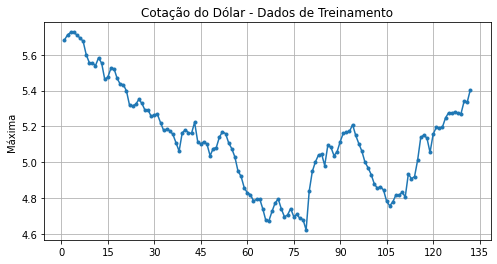

In [58]:
chart.plotLINE(y=y_training, y_label='Máxima', title='Cotação do Dólar - Dados de Treinamento')

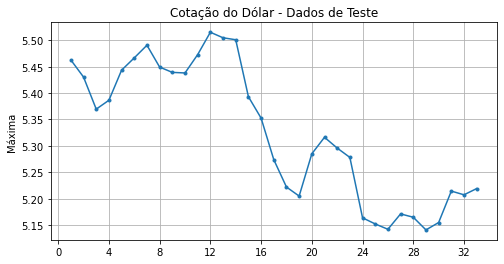

In [59]:
chart.plotLINE(y=y_test, y_label='Máxima', title='Cotação do Dólar - Dados de Teste')

In [71]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.arima import ARIMA
arima = ARIMA()

arima.fit(
    inputs=y_training, # lista com os dados numéricos de entrada
    p=132, # número de períodos/observações utilizados no modelo.
    d=0, # número de diferenciações aplicadas à série temporal.
    q=0, # número correspondente à ordem da média móvel.
    seasonality=0, # número de períodos de sazonalidade na série temporal (SARIMA).
    adjust=5, # número adicionado aos valores da série como ajuste da regressão.
    d_before=False, # se definido como True, aplicará as diferenciações do parâmetro "d" antes do cálculo das médias móveis, caso contrário, aplicará depois.
    d_after=True, # se definido como True, aplicará as diferenciações do parâmetro "d" após o cálculo das médias móveis, caso contrário, aplicará antes.
    outliers=True # se definido como True, permanecerá com os valores originais da série de entrada, caso contrário, removerá os outliers.
)


True

In [72]:
result = arima.predict(predictions=33)

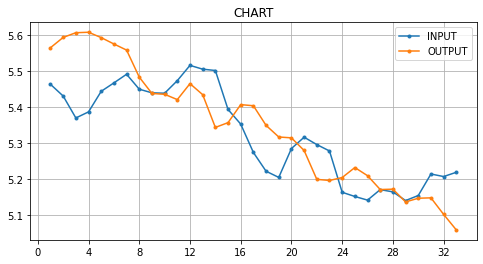

In [73]:
chart.plotMATRIX(matrix1=y_test, matrix2=result)